# binary igen 

In [28]:

import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import sklearn
import keras
from tensorflow.keras.optimizers.legacy import Adam
from scikeras.wrappers import KerasRegressor
from keras.layers import Dropout
from keras.utils import to_categorical
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import tensorflow as tf
import torch
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [29]:
df = pd.read_csv('Data for python.csv', sep=';', header=1, index_col=0, decimal=',')
df = df.fillna(0)
df = df.drop(columns=['Id'])
df = df.drop(columns=['ScandcleftID'])
df = df.drop(columns=['Født'])
df = df.drop(columns=['Materialedato A'])
df = df.drop(columns=['Materialedato B'])
df = df.drop(columns=['Materialedato C'])

In [30]:
def pin_update(row):
    if row["Total Row Score C"] <= 7:
        return 1
    else:
        return 0

In [31]:
def pin_update1(row):
     if 5 < row["Total Row Score C"]:
          return 1
     else:
          return 0 

In [32]:
Output = df.apply(pin_update, axis=1)
#Output1 = df.apply(pin_update1, axis=1)
df['Output'] = Output
#df['Output1'] = Output1


In [33]:
df1 = df[["Anteroposterior 1",
          'Anteroposterior 2',
          'Vertical 1',
          'Vertical 2',
          'Transverse',
          'Spacing',
          'Pan 1',
          'Total Row Score A',
          'Anteroposterior 1.1',
          'Anteroposterior 2.1',
          'Vertical 1.1',
          'Vertical 2.1',
          'Transverse.1',
          'Spacing.1',
          'Pan 1.1',
          'Total Row Score B',
          'Output']]


df1 = df1.iloc[1:, :]
df1

,Anteroposterior 1,Anteroposterior 2,Vertical 1,Vertical 2,Transverse,Spacing,Pan 1,Total Row Score A,Anteroposterior 1.1,Anteroposterior 2.1,Vertical 1.1,Vertical 2.1,Transverse.1,Spacing.1,Pan 1.1,Total Row Score B,Output
Center,,,,,,,,,,,,,,,,,
H,9.0,0.0,0.0,0.0,6.0,4.0,0.0,23,0.0,0.0,0.0,0.0,6.0,4.0,0.0,13,1
H,9.0,0.0,0.0,0.0,6.0,1.0,0.0,21,9.0,0.0,2.0,4.0,6.0,0.0,0.0,25,0
H,0.0,0.0,0.0,0.0,2.0,1.0,0.0,10,0.0,3.0,0.0,0.0,6.0,3.0,0.0,10,0
H,9.0,0.0,1.0,0.0,6.0,0.0,0.0,25,9.0,1.0,2.0,0.0,6.0,0.0,0.0,26,0
H,0.0,0.0,0.0,0.0,6.0,0.0,0.0,10,0.0,0.0,0.0,0.0,2.0,4.0,0.0,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Å,9.0,0.0,1.0,0.0,6.0,3.0,0.0,23,9.0,0.0,0.0,0.0,6.0,3.0,0.0,21,1
Å,9.0,0.0,4.0,0.0,0.0,0.0,0.0,21,12.0,0.0,3.0,4.0,6.0,0.0,0.0,32,1
Å,12.0,0.0,0.0,0.0,6.0,0.0,0.0,25,9.0,0.0,0.0,0.0,6.0,0.0,0.0,23,0


In [34]:
#sletter output1 skal bare sættes ind igen

target_column = ["Output"]
numerical_column = df1.columns.drop(target_column)
output_rows = df1[target_column]
df1.drop(target_column,axis=1,inplace=True)


In [35]:
df_syn = pd.read_csv('synthetic_data.csv')
Output = df_syn.apply(pin_update, axis=1)
Output1 = df_syn.apply(pin_update1, axis=1)
#Output2 = df_syn.apply(pin_update2, axis=1)
df_syn['Output'] = Output
df_syn['Output1'] = Output1
#df_syn['Output2']  = Output2
df_syn
df1_syn = df_syn[["Anteroposterior 1",
          'Anteroposterior 2',
          'Vertical 1',
          'Vertical 2',
          'Transverse',
          'Spacing',
          'Tooth shape/size\r\n',
          "Pan 2\r\n",
          'Total Row Score A',
          'Anteroposterior 1.1',
          'Anteroposterior',
          'Vertical 1.1',
          'Vertical 2.1',
          'Transverse.1',
          'Spacing.1',
          'Tooth shape/size\r\n.1',
          'Pan 2\r\n.1',
          'Total Row Score B',
          'Output',
          'Output1']]
df1_syn.iloc[1:, :]

target_column = ["Output","Output1"]
numerical_column = df1_syn.columns.drop(target_column)
output_rows_syn = df1_syn[target_column]
df1_syn.drop(target_column,axis=1,inplace=True)

scaler = MinMaxScaler()
scaler.fit(df1_syn)
df1_syn = scaler.transform(df1_syn)


X_train_syn, X_test_syn, y_train_syn, y_test_syn = train_test_split(df1_syn, output_rows_syn, test_size=0.25,shuffle=True)



/var/folders/d5/qsvd0xbs3610vyxc_s5y8cv80000gn/T/ipykernel_2076/812672998.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_syn.drop(target_column,axis=1,inplace=True)


In [36]:
X_train, X_test, y_train, y_test = train_test_split(df1, output_rows, test_size=0.25,shuffle=True)


In [37]:
df1

,Anteroposterior 1,Anteroposterior 2,Vertical 1,Vertical 2,Transverse,Spacing,Pan 1,Total Row Score A,Anteroposterior 1.1,Anteroposterior 2.1,Vertical 1.1,Vertical 2.1,Transverse.1,Spacing.1,Pan 1.1,Total Row Score B
Center,,,,,,,,,,,,,,,,
H,9.0,0.0,0.0,0.0,6.0,4.0,0.0,23,0.0,0.0,0.0,0.0,6.0,4.0,0.0,13
H,9.0,0.0,0.0,0.0,6.0,1.0,0.0,21,9.0,0.0,2.0,4.0,6.0,0.0,0.0,25
H,0.0,0.0,0.0,0.0,2.0,1.0,0.0,10,0.0,3.0,0.0,0.0,6.0,3.0,0.0,10
H,9.0,0.0,1.0,0.0,6.0,0.0,0.0,25,9.0,1.0,2.0,0.0,6.0,0.0,0.0,26
H,0.0,0.0,0.0,0.0,6.0,0.0,0.0,10,0.0,0.0,0.0,0.0,2.0,4.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Å,9.0,0.0,1.0,0.0,6.0,3.0,0.0,23,9.0,0.0,0.0,0.0,6.0,3.0,0.0,21
Å,9.0,0.0,4.0,0.0,0.0,0.0,0.0,21,12.0,0.0,3.0,4.0,6.0,0.0,0.0,32
Å,12.0,0.0,0.0,0.0,6.0,0.0,0.0,25,9.0,0.0,0.0,0.0,6.0,0.0,0.0,23


In [38]:
no_classes = 3
no_epochs = 10
optimizer = Adam()
verbosity = 1
num_folds = 5
batch_size = 64
acc_per_fold = []
loss_per_fold = []
fold_no = 1

In [39]:
inputs = np.concatenate((X_train_syn, X_test_syn), axis=0)
targets = np.concatenate((y_train_syn, y_test_syn), axis=0)

kfold = KFold(n_splits=num_folds, shuffle=True)

In [40]:
for train, test in kfold.split(inputs, targets):
    model = Sequential()
    model.add(Dense(128, input_dim=18, activation='relu'))
    #model.add(Dropout(0.3))
    #model.add(Dense(128, activation='relu'))
    #model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu'))
    #model.add(Dropout(0.4))
    model.add(Dense(16,activation='relu'))
    #model.add(Dropout(0.4))
    model.add(Dense(8,activation='relu'))
    #model.add(Dropout(0.4))
    model.add(Dense(2, activation='softmax'))
 # Compile model
    model.compile(loss='binary_crossentropy' , optimizer='adam', metrics=['accuracy'])

     # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
  # Fit data to model
    history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity)

  # Generate generalization metrics
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] *100)
    loss_per_fold.append(scores[0])

  # Increase fold number
    fold_no = fold_no + 1
    
fold_no = 1 

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/10
223/223 [==============================] - 9s 22ms/step - loss: 0.6576 - accuracy: 0.6923
Epoch 2/10
223/223 [==============================] - 3s 13ms/step - loss: 0.6550 - accuracy: 0.6899
Epoch 3/10
223/223 [==============================] - 3s 13ms/step - loss: 0.6579 - accuracy: 0.6786
Epoch 4/10
223/223 [==============================] - 3s 13ms/step - loss: 0.6593 - accuracy: 0.6706
Epoch 5/10
223/223 [==============================] - 3s 13ms/step - loss: 0.6585 - accuracy: 0.6701
Epoch 6/10
223/223 [==============================] - 3s 14ms/step - loss: 0.6600 - accuracy: 0.6672
Epoch 7/10
223/223 [==============================] - 3s 14ms/step - loss: 0.6565 - accuracy: 0.6880
Epoch 8/10
223/223 [==============================] - 3s 13ms/step - loss: 0.6553 - accuracy: 0.6881
Epoch 9/10
223/223 [==============================] - 3s 13ms/step - loss: 0.6577 - accuracy: 0

In [41]:
df11 = df[["Anteroposterior 1",
          'Anteroposterior 2',
          'Vertical 1',
          'Vertical 2',
          'Transverse',
          'Spacing',
          'Pan 1',
          'Total Row Score A',
          'Anteroposterior 1.1',
          'Anteroposterior 2.1',
          'Vertical 1.1',
          'Vertical 2.1',
          'Transverse.1',
          'Spacing.1',
          'Pan 1.1',
          'Total Row Score B',
          'Output']]


df11 = df1.iloc[1:, :]
df11

,Anteroposterior 1,Anteroposterior 2,Vertical 1,Vertical 2,Transverse,Spacing,Pan 1,Total Row Score A,Anteroposterior 1.1,Anteroposterior 2.1,Vertical 1.1,Vertical 2.1,Transverse.1,Spacing.1,Pan 1.1,Total Row Score B
Center,,,,,,,,,,,,,,,,
H,9.0,0.0,0.0,0.0,6.0,1.0,0.0,21,9.0,0.0,2.0,4.0,6.0,0.0,0.0,25
H,0.0,0.0,0.0,0.0,2.0,1.0,0.0,10,0.0,3.0,0.0,0.0,6.0,3.0,0.0,10
H,9.0,0.0,1.0,0.0,6.0,0.0,0.0,25,9.0,1.0,2.0,0.0,6.0,0.0,0.0,26
H,0.0,0.0,0.0,0.0,6.0,0.0,0.0,10,0.0,0.0,0.0,0.0,2.0,4.0,0.0,9
H,12.0,1.0,0.0,0.0,6.0,0.0,0.0,28,12.0,4.0,0.0,3.0,8.0,0.0,0.0,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Å,9.0,0.0,1.0,0.0,6.0,3.0,0.0,23,9.0,0.0,0.0,0.0,6.0,3.0,0.0,21
Å,9.0,0.0,4.0,0.0,0.0,0.0,0.0,21,12.0,0.0,3.0,4.0,6.0,0.0,0.0,32
Å,12.0,0.0,0.0,0.0,6.0,0.0,0.0,25,9.0,0.0,0.0,0.0,6.0,0.0,0.0,23


In [42]:
predicted = model.predict(df1_syn)
tensor = torch.tensor(output_rows_syn.values)


557/557 [==============================] - 2s 3ms/step


tf.Tensor(
[[0.65743047 0.34256953]
 [0.72345895 0.27654102]
 [0.6732959  0.32670408]
 ...
 [0.67460644 0.32539362]
 [0.6661907  0.3338093 ]
 [0.639655   0.36034498]], shape=(17810, 2), dtype=float32)


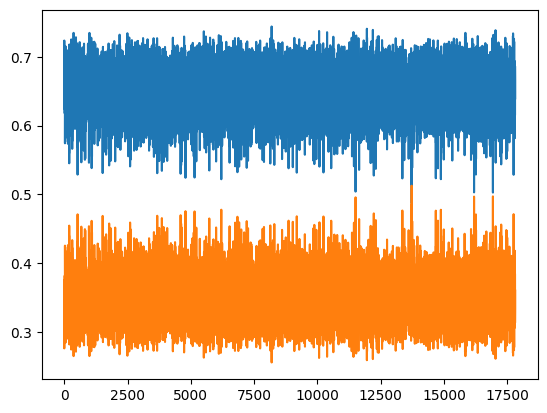

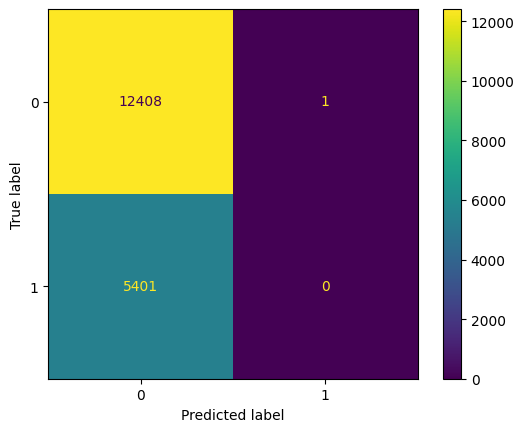

In [43]:
predic = tf.squeeze(predicted)
plt.plot(predic)
print(predic)
predict= np.array([np.argmax(row) for row in predic])
actual = np.array([np.argmax(row) for row in tensor])
conf_mat = confusion_matrix(actual, predict)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

In [44]:
def total_row_score(vector):
    vector[7] = sum(vector[0:7])
    vector[15] = sum(vector[8:15])
    print(vector)

In [45]:

xnew = np.array([12, 0, 3, 0, 6, 4 ,4, 0,
                 12, 0, 2, 3, 8, 4, 3, 0])

total_row_score(xnew)

new_prediction = model.predict(xnew.reshape(1,16))
new_prediction = tf.squeeze(new_prediction)

print(new_prediction)

[12  0  3  0  6  4  4 29 12  0  2  3  8  4  3 32]


ValueError: in user code:

    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_7" is incompatible with the layer: expected shape=(None, 18), found shape=(None, 16)


In [ ]:
import shap 

explainer = shap.DeepExplainer(model, X_train_syn)
shap_values = explainer.shap_values(X_test_syn)
shap.summary_plot(shap_values, X_test_syn)

